## Import Dependencies

In [25]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import matplotlib.pyplot as plt

## import the dataset to work with

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')

data.columns = ['recency', 'frequency', 'volume_donated', 'months_since_first_donate', 'donated_march07']

X = data.drop('donated_march07', axis = 1)
y = data['donated_march07']

## Set up your train test split

In [26]:
from sklearn.cross_validation import train_test_split

## splitting our data into 70% training and 30% testing with test size = .3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

## Build Base Model

In [27]:
# Instantiate the model here
lgr = LogisticRegression()

# fit our model on our predefined training data
lgr_fit = lgr.fit(X_train, y_train)

# creating a set of predictions for our y_tests in order to check model accuracy
y_preds = lgr_fit.predict(X_test)

## Evaluate Base Model

In [28]:
# Importing metrics in order to make classification report and get accuracy score
from sklearn import metrics

# Here i am getting the accuracy score by comparing our predicted outputs for the y_test
# values (y_pred), to the actual y_test values
lgr_accuracy = metrics.accuracy_score(y_preds, y_test)

#creating a string of the type of model
modelname = 'Logistic Regression'

accuracy = metrics.accuracy_score(y_test, y_preds)
precision = metrics.precision_score(y_test,y_preds)
recall = metrics.recall_score(y_test,y_preds)
classification_report = metrics.classification_report(y_test, y_preds)
confusion_matrix = metrics.confusion_matrix(y_test, y_preds)

print modelname,"Accuracy Score: ", accuracy
# this is the precision score for the target output of 1
print modelname,"Precision: ", precision
# this is the recall score for the target output of 1
print modelname,"Recall: ", recall
print
print 'confusion matrix\n', confusion_matrix
print
print (metrics.classification_report(y_test, y_preds))

Logistic Regression Accuracy Score:  0.742222222222
Logistic Regression Precision:  0.666666666667
Logistic Regression Recall:  0.0983606557377

confusion matrix
[[161   3]
 [ 55   6]]

             precision    recall  f1-score   support

          0       0.75      0.98      0.85       164
          1       0.67      0.10      0.17        61

avg / total       0.72      0.74      0.66       225



## Building an ROC Curve

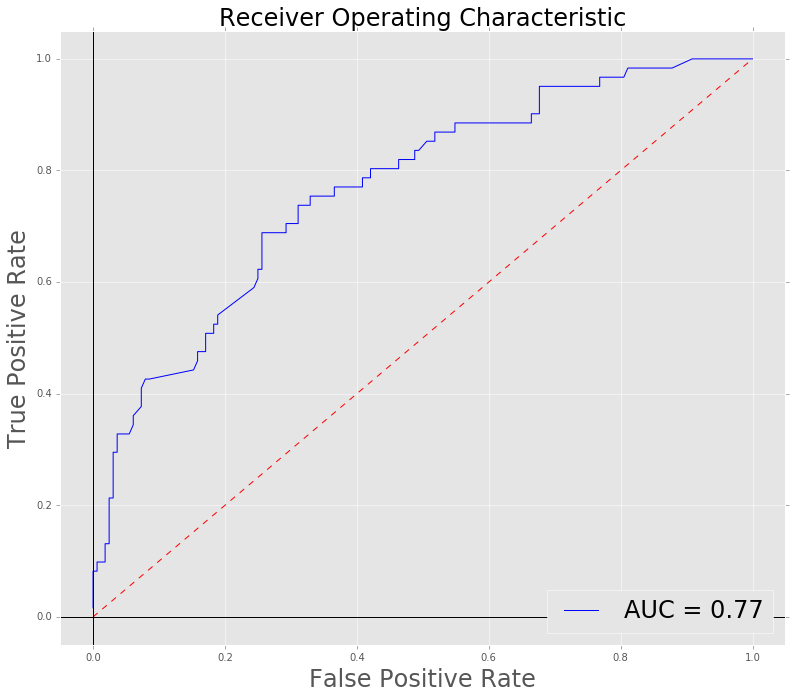

In [29]:
# We have already imported metrics which is what we need to build the ROC Curve

# ROC - Reciever Operating Characteristic, used to measure basically the False Positive
# rate (x-axis) against the true positive rate (y-axis)

## Insert your instantiated and fit model below
model = lgr_fit


#Here we are creating our predicted probabilities. This goes beyond whether something is
# predicted as a 1 or a zero, but is their actual probability (from 0 to 1) that the output
# is a 1. For example, if the predic_proba value is .34, there is a 34% chance that datapoint
# is a 1
y_probs = model.predict_proba(X_test)

#False Positive Rate, True Poisitive Rate
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_probs[:,1])
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

#### Plot the ROC Curve

# choosing a background style for our graph
plt.style.use('ggplot')
# increasing the size of the figure
plt.figure(figsize = (13, 11))
#giving the graph a title
plt.title('Receiver Operating Characteristic', fontsize = 24)
# plotting the fpr and tpr that were defined above on our graph
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
# creating a legend in the lower right section of the graph with the plot label
plt.legend(loc='lower right', fontsize = 24)
#drawing a dashed straight line from points (0, 0) to (1, 1)
plt.plot([0,1],[0,1],'r--')
# setting the scale for each axis
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
# drawing the axis lines and x and y = 0
plt.axhline(0, color='black')
plt.axvline(0, color='black')
#labeling the x and y axes
plt.ylabel('True Positive Rate', fontsize = 24)
plt.xlabel('False Positive Rate', fontsize = 24)
# showing our plot
plt.show()